.. todo:: Reimplement the other two graphics.

# Simulation - Example

Keane and Wolpin (1994) generate three different Monte Carlo samples. We study their first parameterization in more detail now. We label the two occupations as Occupation A and Occupation B. We first plot the returns to experience. Occupation B is more skill intensive in the sense that own experience has higher return than is the case for Occupation A. There is some general skill learned in Occupation A which is transferable to Occupation B. However, work experience is occupation-specific in Occupation B.

In [1]:
import matplotlib.pyplot as plt
from respy.python.shared.shared_constants import ROOT_DIR
plt.style.use(str(ROOT_DIR.parent / "docs" / "respy.mplstyle"))

from respy.clsRespy import RespyCls

from respy import get_example_model
from respy.python.interface import respy_interface

from statsmodels.regression.linear_model import OLS
import numpy as np

In [2]:
options_spec, params_spec = get_example_model("kw_data_one")
respy_obj = RespyCls(params_spec, options_spec)

# We have to create this file. Otherwise quadratic experiences are not rescaled
# and the simulation returns nonsense.
open(".restud.respy.scratch", "w").close()

state_space, df = respy_interface(respy_obj, "simulate")

# Select only data with wages
wages = df.loc[df.Wage.notnull()].copy()

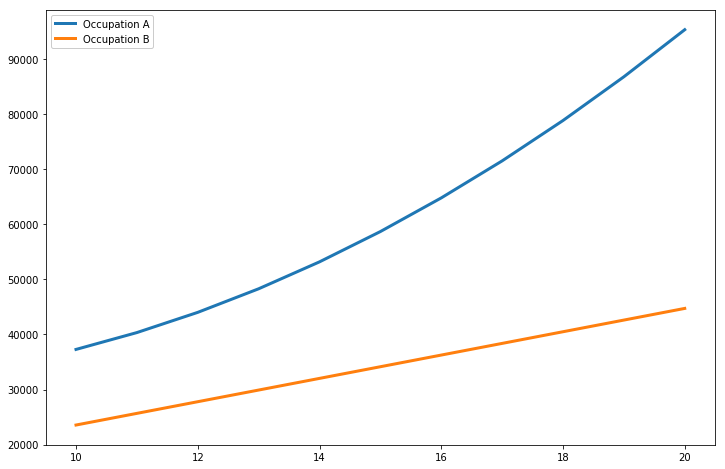

In [3]:
model = OLS.from_formula("Wage ~ Years_Schooling * C(Choice) + np.power(Years_Schooling, 2) * C(Choice)", data=wages)
res = model.fit()

coeffs = res.params.to_numpy()

years_schooling = np.arange(10, 21)
base = coeffs[0] + coeffs[2] * years_schooling + coeffs[4] * years_schooling ** 2
wage_a = base + coeffs[4] * years_schooling ** 2
wage_b = base + coeffs[1] + coeffs[3] * years_schooling + coeffs[5] * years_schooling ** 2

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(years_schooling, wage_a, label="Occupation A")
ax.plot(years_schooling, wage_b, label="Occupation B")

ax.legend()

plt.show()
plt.close()

![](images/returns_experience.png)

The next figure shows that the returns to schooling are larger in Occupation B. While its initial wage is lower, it does increase faster with schooling compared to Occupation A.

![](images/returns_schooling.png)

Simulating a sample of 1,000 agents from the model allows us to study how these features interact in determining agent decisions over their life cycle. Note that all agents start out identically, different choices are simply the cumulative effects of different shocks. Initially, 50% of agents increase their level of schooling but the share of agents enrolled in school declines sharply over time. The share working in Occupation A hovers around 40% at first, but then declines to 21%. Occupation B continuously gains in popularity, initially only 11% work in Occupation B but its share increases to about 77%. Around 1.5% stay at home each period. We visualize this choice pattern in detail below.

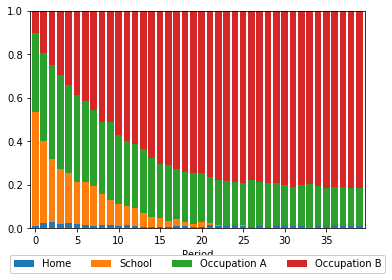

In [4]:
fig, ax = plt.subplots()

shares = df.groupby("Period").Choice.value_counts().unstack()[[4, 3, 1, 2]].div(1000)

shares.plot.bar(stacked=True, ax=ax, width=0.8)

ax.legend(
    labels=["Home", "School", "Occupation A", "Occupation B"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=4
)

ax.set_ylim(0, 1)

ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5), rotation="horizontal")

plt.show()

We start out with the large majority of agents working in Occupation A. Eventually, however, most agents ends up working in Occupation B. As the returns to education are higher for Occupation B and previous work experience is transferable, Occupation B gets more and more attractive as agents increase their level of schooling and gain experience in the labor market.